# 2. Modelling

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

## 2.0. Uploaded (rescaled) preprocessed images/labels and renormalise them

In [29]:
import cv2
import os

# Load preprocessed training images and labels
train_input_dir = '../data/preprocessed/train'

train_images = []
train_labels = []

for filename in os.listdir(train_input_dir):
    if filename.startswith("rescaled_preprocessed_image_"):
        image_path = os.path.join(train_input_dir, filename)
        image = cv2.imread(image_path)
        train_images.append(image)
    elif filename.startswith("rescaled_preprocessed_label_"):
        label_path = os.path.join(train_input_dir, filename)
        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
        train_labels.append(label)

# Load preprocessed validation images and labels
val_input_dir = '../data/preprocessed/valid'

val_images = []
val_labels = []

for filename in os.listdir(val_input_dir):
    if filename.startswith("rescaled_preprocessed_image_"):
        image_path = os.path.join(val_input_dir, filename)
        image = cv2.imread(image_path)
        val_images.append(image)
    elif filename.startswith("rescaled_preprocessed_label_"):
        label_path = os.path.join(val_input_dir, filename)
        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
        val_labels.append(label)

# Load preprocessed test images
test_input_dir = '../data/preprocessed/test'

test_images = []

for filename in os.listdir(test_input_dir):
    if filename.startswith("rescaled_preprocessed_image_"):
        image_path = os.path.join(test_input_dir, filename)
        image = cv2.imread(image_path)
        test_images.append(image)


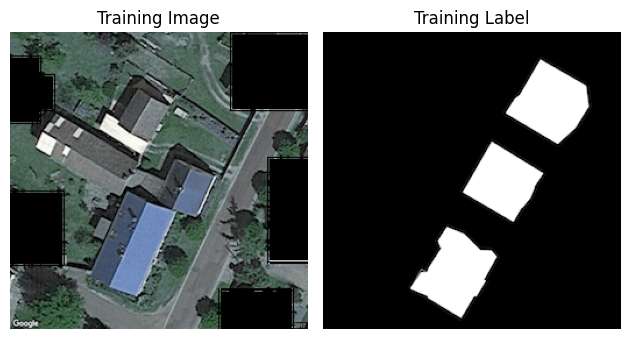

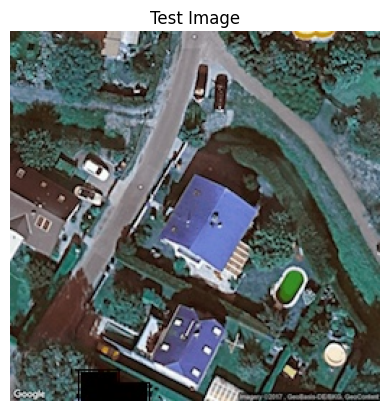

In [30]:
# Display a training image and its corresponding label
index = 0  # Adjust the index to choose a specific training sample

# Training image
plt.subplot(1, 2, 1)
plt.imshow(train_images[index])
plt.title('Training Image')
plt.axis('off')

# Training label
plt.subplot(1, 2, 2)
plt.imshow(train_labels[index], cmap='gray')
plt.title('Training Label')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display a test image
test_index = 0  # Adjust the index to choose a specific test sample

plt.imshow(test_images[test_index])
plt.title('Test Image')
plt.axis('off')
plt.show()

In [31]:
# Normalize pixel values
train_images = np.array(train_images) / 255.0
train_labels = np.array(train_labels) / 255.0

val_images = np.array(val_images) / 255.0
val_labels = np.array(val_labels) / 255.0

test_images = np.array(test_images) / 255.0

## 2.1 Network Architechture

We choose
Design a CNN architecture suitable for the image segmentation task. U-Net, SegNet, or Mask R-CNN are popular choices for such tasks. The network should take the input image as input and generate a binary mask where the roofs' boundaries are represented as white pixels (255) and the rest of the image as black (0).

U-Net is a popular choice due to its effectiveness in capturing spatial information. Below is an example implementation of the U-Net architecture:

In [32]:
def unet(input_shape):
    inputs = keras.layers.Input(input_shape)

    # Contracting Path (Encoder)
    conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottom of U-Net
    conv5 = keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Expanding Path (Decoder)
    up6 = keras.layers.concatenate([keras.layers.UpSampling2D(size=(2, 2))(conv5), conv4], axis=3)
    conv6 = keras.layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = keras.layers.concatenate([keras.layers.UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
    conv7 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = keras.layers.concatenate([keras.layers.UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
    conv8 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = keras.layers.concatenate([keras.layers.UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
    conv9 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = keras.layers.Conv2D(1, 1, activation='sigmoid')(conv9)
    model = keras.models.Model(inputs=inputs, outputs=conv10)
    
    return model


In [33]:
model = unet(input_shape=(256, 256, 3))  # Adjust input shape as per your images
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_38[0][0]']              
                                )                                                           

In [35]:
# Assuming you have preprocessed training data and labels in X_train and y_train
model.fit(train_images, train_labels, batch_size=8, epochs=20, validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 71s 18s/step - loss: 1.3951 - accuracy: 0.6512 - val_loss: 1.9866 - val_accuracy: 0.8422
Epoch 2/20
4/4 [==============================] - 65s 17s/step - loss: 2.0828 - accuracy: 0.8350 - val_loss: 1.9866 - val_accuracy: 0.8423
Epoch 3/20
4/4 [==============================] - 68s 17s/step - loss: 2.0828 - accuracy: 0.8350 - val_loss: 1.9866 - val_accuracy: 0.8423
Epoch 4/20
4/4 [==============================] - 78s 21s/step - loss: 2.0828 - accuracy: 0.8350 - val_loss: 1.9866 - val_accuracy: 0.8423
Epoch 5/20
4/4 [==============================] - 65s 16s/step - loss: 2.0828 - accuracy: 0.8350 - val_loss: 1.9866 - val_accuracy: 0.8423
Epoch 6/20
4/4 [==============================] - 67s 17s/step - loss: 2.0828 - accuracy: 0.8350 - val_loss: 1.9866 - val_accuracy: 0.8423
Epoch 7/20
4/4 [==============================] - 65s 17s/step - loss: 2.0828 - accuracy: 0.8350 - val_loss: 1.9866 - val_accuracy: 0.8423
Epoch 8/20
4/4 [===========